In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "flipkart_mobiles.csv"
df = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
print(df.head())

                              Name   Brand  Ratings No_of_ratings  \
0    realme 9i (Prism Blue, 64 GB)  realme      4.5      1,11,865   
1   realme 9i (Prism Black, 64 GB)  realme      4.5      1,11,865   
2   realme 9i (Prism Blue, 128 GB)  realme      4.5         25380   
3  realme 9i (Prism Black, 128 GB)  realme      4.5      1,11,865   
4   realme 9i (Prism Blue, 128 GB)  realme      4.5      1,11,865   

   No_of_reviews                                   Product_features    MSP  \
0           6611  ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...  10999   
1           6611  ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...  10999   
2           1517  ['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...  13499   
3           6611  ['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...  10999   
4           6611  ['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...  10999   

     MRP  Discount  
0  15999        31  
1  15999        31  
2  17999        25  
3  16999        35  
4  16999   

In [3]:
# Basic info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              622 non-null    object 
 1   Brand             622 non-null    object 
 2   Ratings           622 non-null    float64
 3   No_of_ratings     622 non-null    object 
 4   No_of_reviews     622 non-null    int64  
 5   Product_features  622 non-null    object 
 6   MSP               622 non-null    object 
 7   MRP               622 non-null    object 
 8   Discount          622 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 43.9+ KB
None


In [4]:
# Descriptive statistics
print(df.describe())

          Ratings  No_of_reviews    Discount
count  622.000000     622.000000  622.000000
mean     4.267203    3393.704180   18.442122
std      0.188438    5212.468223   11.195627
min      3.400000       0.000000    1.000000
25%      4.200000     201.000000    9.000000
50%      4.300000    1277.000000   18.000000
75%      4.400000    4608.000000   28.000000
max      4.800000   34744.000000   46.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

Name                0
Brand               0
Ratings             0
No_of_ratings       0
No_of_reviews       0
Product_features    0
MSP                 0
MRP                 0
Discount            0
dtype: int64


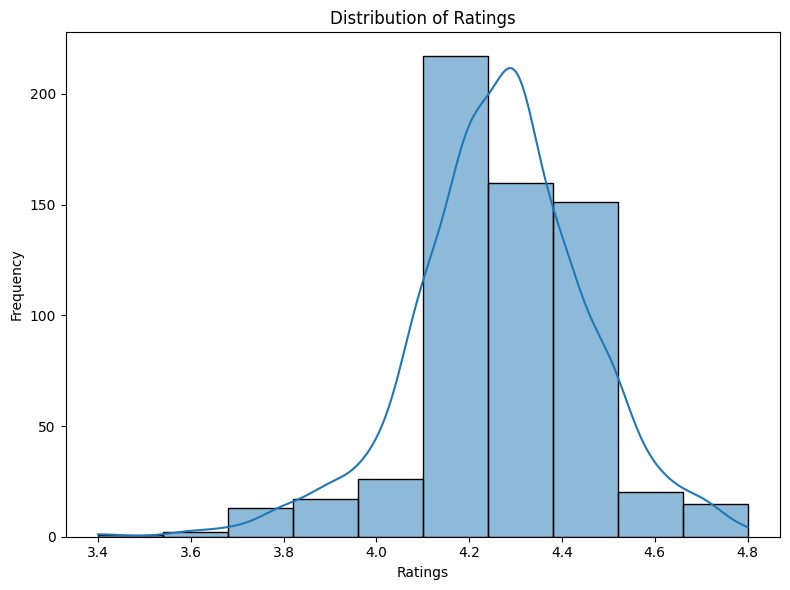

In [6]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

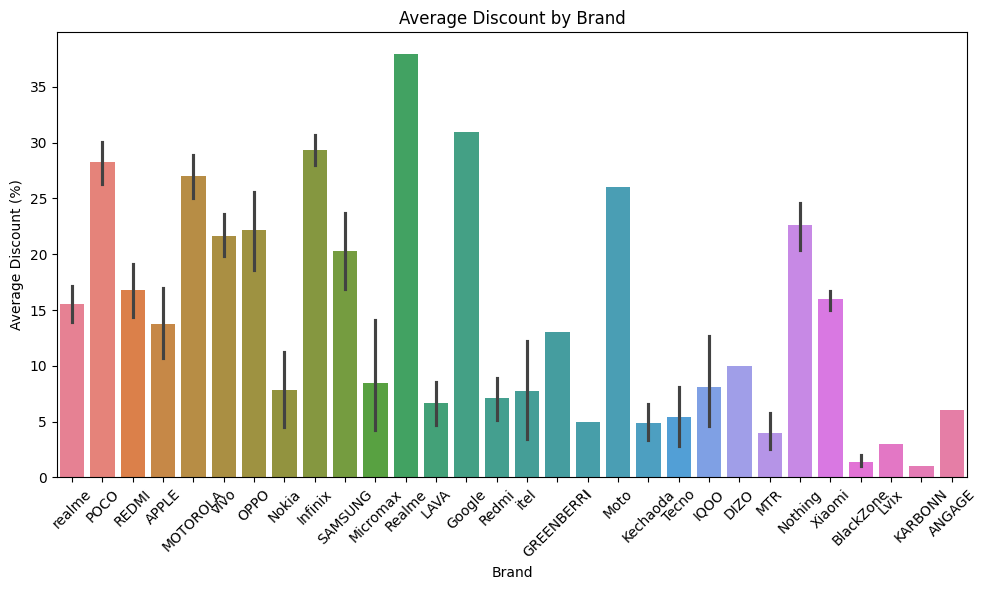

In [20]:
# Bar plot of average discount by brand
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Discount', data=df, estimator=np.mean, hue='Brand')
plt.title('Average Discount by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

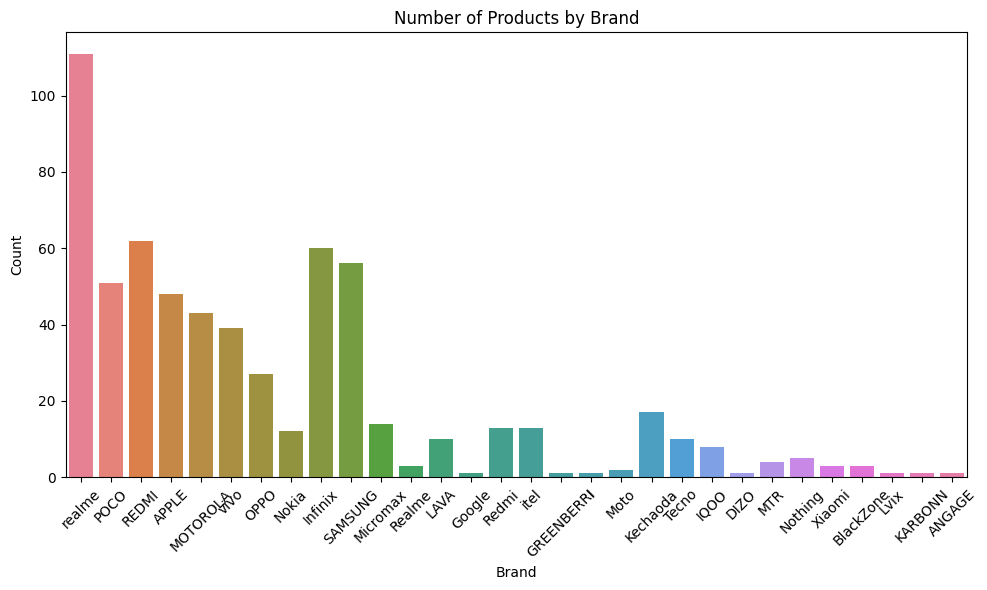

In [19]:
# Count plot of number of products by brand
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=df, hue='Brand')
plt.title('Number of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

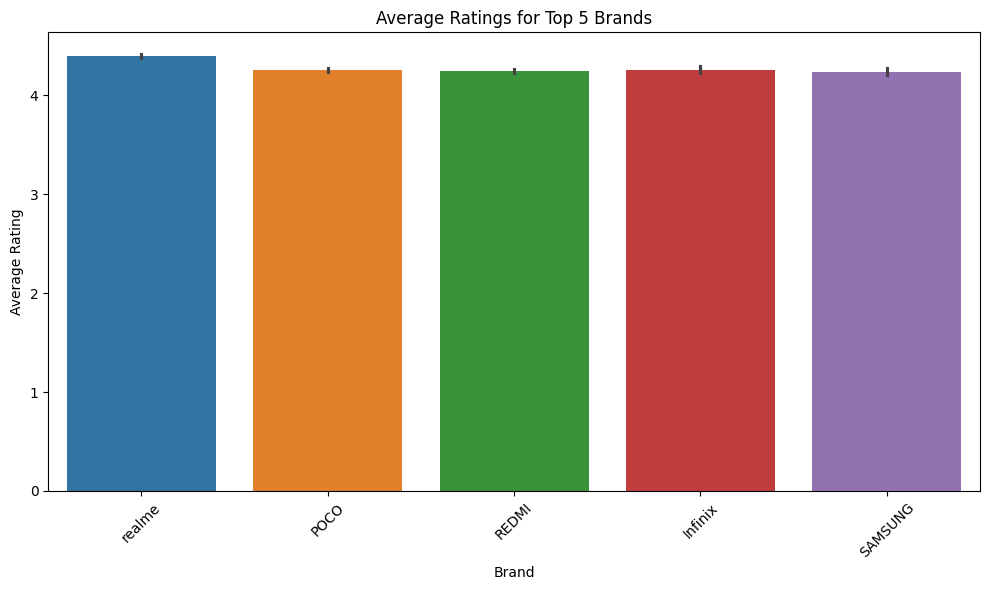

In [18]:
# Average Ratings for Top 5 Brands by Count
top_brands = df['Brand'].value_counts().head(5).index
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Ratings', data=df[df['Brand'].isin(top_brands)], estimator=np.mean, hue='Brand')
plt.title('Average Ratings for Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

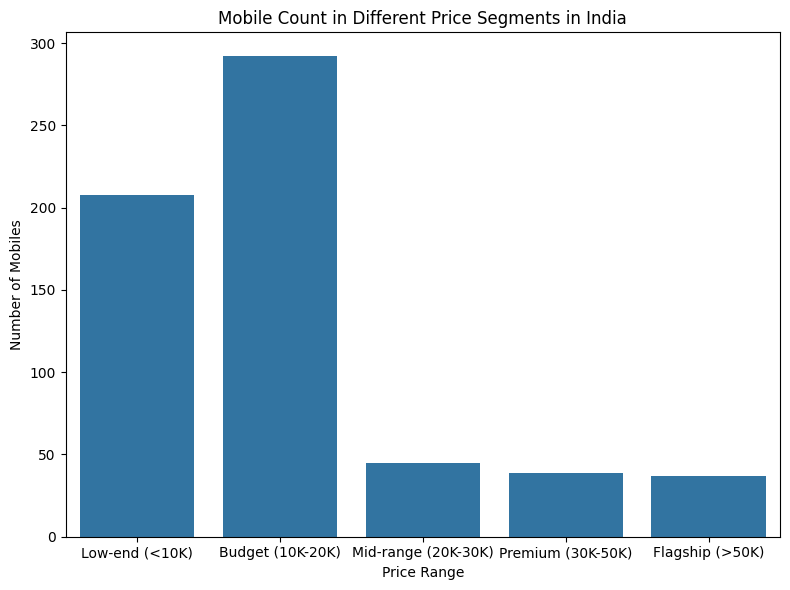

In [17]:
#mobile count in different price segment
df['MSP'] = pd.to_numeric(df['MSP'], errors='coerce')
bins = [0, 10000, 20000, 30000, 50000, 100000]  # Define ranges
labels = ['Low-end (<10K)', 'Budget (10K-20K)', 'Mid-range (20K-30K)', 'Premium (30K-50K)', 'Flagship (>50K)']
df['Price_Range'] = pd.cut(df['MSP'], bins=bins, labels=labels)
price_range_count = df['Price_Range'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=price_range_count.index, y=price_range_count.values)
plt.title('Mobile Count in Different Price Segments in India')
plt.xlabel('Price Range')
plt.ylabel('Number of Mobiles')
plt.tight_layout()
plt.show()

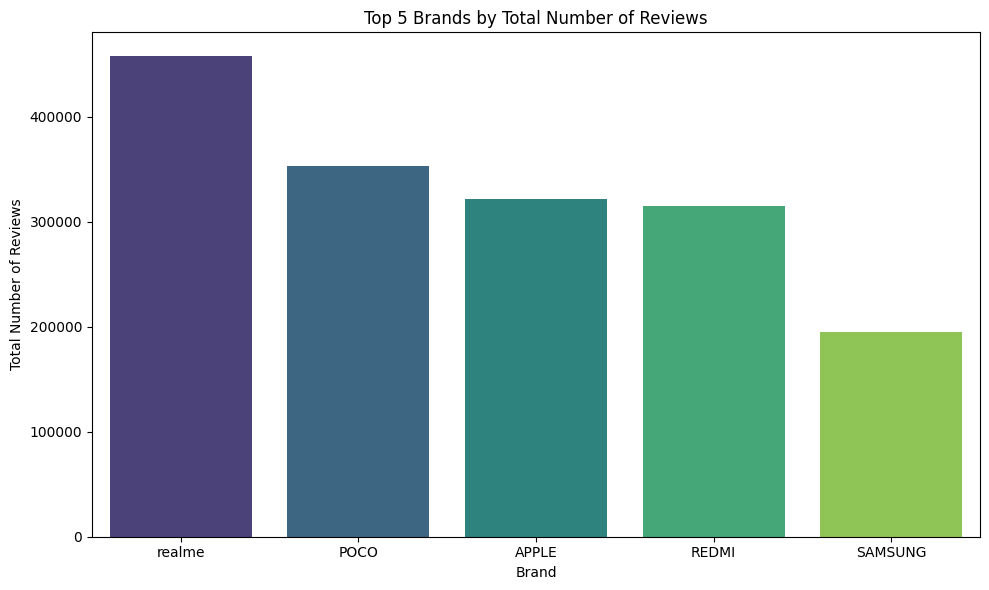

In [16]:
# Calculate the top 5 brands by total number of reviews
top_5_brands_by_reviews = df.groupby('Brand')['No_of_reviews'].sum().sort_values(ascending=False).head(5)
top_5_brands_by_reviews_df = top_5_brands_by_reviews.reset_index()
# Plot the top 5 brands by total number of reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='No_of_reviews', data=top_5_brands_by_reviews_df, palette='viridis', hue='Brand',legend=False)
plt.title('Top 5 Brands by Total Number of Reviews')
plt.xlabel('Brand')
plt.ylabel('Total Number of Reviews')
plt.tight_layout()
plt.show()

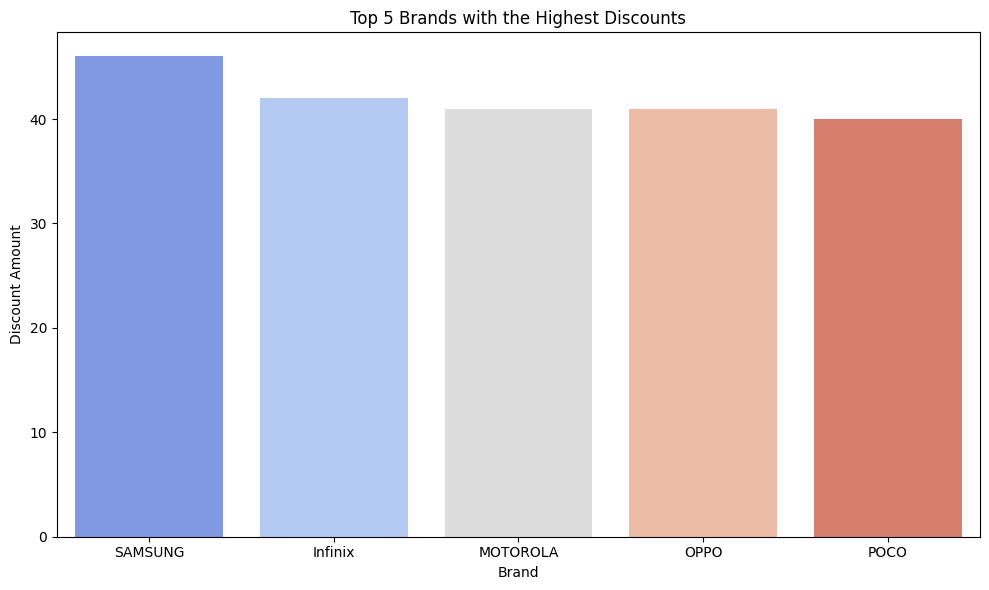

In [21]:
# Group by 'Brand' and get the maximum discount for each brand
brand_highest_discount = df.groupby('Brand')['Discount'].max().reset_index()
top_brands_by_discount = brand_highest_discount.sort_values(by='Discount', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Discount', data=top_brands_by_discount, palette='coolwarm', hue='Brand', legend=False)
plt.title('Top 5 Brands with the Highest Discounts')
plt.xlabel('Brand')
plt.ylabel('Discount Amount')
plt.tight_layout()
plt.show()